<a href="https://colab.research.google.com/github/imarkhvida/Rail_Recognition/blob/main/LogReg_Python_Rail_Recognition_12_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/LogisticRegression/')

In [3]:
# Use seaborn for pairplot
!pip install -q seaborn
#!cp /content/drive/MyDrive/LogisticRegression/Model.py 

# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from Model import LogisticRegressionUsingGD
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from numpy import savetxt
import pickle

!python --version

def load_data(path, header):
    dataframe = pd.read_csv(path, header=header)
    return dataframe

if __name__ == "__main__":
    # path /content/drive/MyDrive/Rail_Features_test80.csv
    data = load_data("/content/drive/MyDrive/061808162020STR489_features_12_No_NULLs.csv",0)
    #print(data.info())
    print(data.head())

Python 3.7.12
  rail_candidate      sigma  sigma_head  ...  faceslope_angle  camera_ang  real_rail
0          RE115  35.830868    1.319997  ...         0.406472    1.098054      RE136
1          RE119   5.173964    1.687201  ...         0.000000    0.803621      RE136
2          RE136   0.689708    0.303410  ...         0.406472    0.619633      RE136
3     HFARA_A100  19.831950    0.000000  ...         0.000000    0.000000      RE136
4       ARA_A100   0.453936    0.000000  ...         0.000000    0.000000      RE136

[5 rows x 14 columns]


##Inspect the Data

In [4]:
#my_rail = '''ARA_A100'''
my_rail = '''RE136'''
data["target"] = np.where(np.logical_and(data['real_rail']==my_rail, data['real_rail']==data['rail_candidate']),1,0).astype('int32')
data = data.drop(columns = ['rail_candidate'])
data = data[['sigma','sigma_head','sigma_base','overheight','underheight','underboth','thickover','thickunder','filletover','filletunder','faceslope_angle','camera_ang','target','real_rail']]
#data = np.where(data['target'] == 1)
data.head(20)
#data.tail(20)

,sigma,sigma_head,sigma_base,overheight,underheight,underboth,thickover,thickunder,filletover,filletunder,faceslope_angle,camera_ang,target,real_rail
0,35.830868,1.319997,0.646172,18.132426,19.839408,18.703092,2.395984,3.028271,12.138884,6.868117,0.406472,1.098054,0,RE136
1,5.173964,1.687201,0.688115,11.306652,0.000000,0.000000,0.549565,0.000000,0.112559,1.509961,0.000000,0.803621,0,RE136
2,0.689708,0.303410,0.467207,0.879124,19.839408,0.357320,2.395984,3.028271,0.440576,0.201536,0.406472,0.619633,1,RE136
3,19.831950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,RE136
4,0.453936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,RE136
5,1.365483,0.851418,0.616235,5.975237,19.839408,6.273508,2.395984,3.028271,12.138884,3.240071,0.406472,0.701607,0,RE136
6,4.547000,1.483143,0.781555,15.123225,0.000000,0.000000,1.124083,0.000000,0.146327,0.531279,0.000000,0.845535,0,RE136
7,4.676992,1.902037,0.813013,10.808614,0.000000,0.000000,1.092976,0.000000,0.112559,0.478795,0.000000,0.798928,0,RE136
8,0.546264,0.409141,0.315836,0.898745,19.839408,0.357320,2.395984,3.028271,0.440576,0.502103,0.406472,0.663252,1,RE136
9,19.831950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,RE136


In [5]:
# sns.pairplot(data, hue = 'target', diag_kind='kde')

In [6]:
 # X class 'pandas.core.frame.DataFrame' = feature values, all the columns except the last 2 columns. 
    
X = data.iloc[:, :-2]
#X = data.iloc[:, 0:1]
X.head(3)

# y = target values, last column of the data frame
y = data.iloc[:, -2]
y.head(3)
#print(type(y))

0    0
1    0
2    1
Name: target, dtype: int32

The accuracy of the model is 100.0
The precision of the model is 100.0
The model parameters using Gradient descent


[-12.66174535  -2.8596746    0.81849221   2.21436552  -2.04113864
   0.53017158  -1.40433948   4.24496752   5.65769356  -1.1827295
  -2.24654022   0.92012904  -0.93486733]


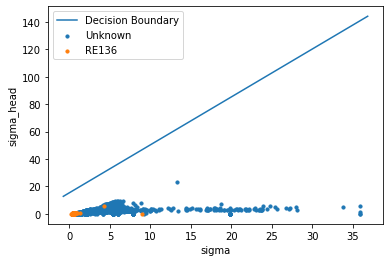

In [7]:
    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Unknown')
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],s=10, label=my_rail)

    # preparing the data for building the model
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    y = y.to_numpy();
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))
    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()

    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    precision = model.precision(X, y.flatten())
    # savetxt('predicted_classes.csv', predicted_classes.flatten(), delimiter = '\n')
    # save to csv file
    savetxt('data.csv', y.flatten(), delimiter='\n')

    print("The accuracy of the model is {}".format(accuracy))
    print("The precision of the model is {}".format(precision))
    print("The model parameters using Gradient descent")
    print("\n")
    print(parameters)

    # plotting the decision boundary
    # As there are two features
    # wo + w1*x1 + w2*x2 = 0
    # x2 = - (wo + w1*x1)/(w2)
    #print (X)
    index = 1
    x_values = [np.min(X[:,index] -1 ), np.max(X[:, index] + 1)]
    #print (x_values)
    y_values = - (parameters[0] + np.dot(parameters[1], x_values))/parameters[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('sigma')
    plt.ylabel('sigma_head')
    plt.legend()
    plt.show()

In [11]:
    # Prepare train and test data
    test_size = 0.33
    seed = 7
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y.reshape(-1,), test_size=test_size, random_state=seed)

In [12]:
    # Using scikit-learn
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # save the model to disk
    filename = 'LogisticRegression_model.sav'
    pickle.dump(model, open(filename, 'wb'))

    parameters = model.coef_
    print("The model parameters using scikit learn")
    print(parameters)
    predicted_classes = model.predict(X_test)
    accuracy = accuracy_score(y_test,predicted_classes)
    print('The accuracy score using scikit-learn is {}'.format(accuracy))
    precision = precision_score(y_test,predicted_classes)
    print('The precision score using scikit-learn is {}'.format(precision))
    recall = recall_score(y_test,predicted_classes)
    print('The recall score using scikit-learn is {}'.format(recall))

The model parameters using scikit learn
[[ 4.44578105e-06 -8.05029896e-02 -2.95426351e-02  1.96324442e-03
  -5.04798328e-01  6.30410793e-01 -9.78470233e-01  3.62301954e-01
   5.01012718e-01 -3.89382996e-01 -2.29134765e-01  7.99585632e-02
   8.28115951e-03]]
The accuracy score using scikit-learn is 0.9992932862190813
The precision score using scikit-learn is 1.0
The recall score using scikit-learn is 0.9787234042553191
